In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define the data directories
train_dir = '/content/drive/MyDrive/Colab Notebooks/Image-Project/Data/train'
val_dir = '/content/drive/MyDrive/Colab Notebooks/Image-Project/Data/valid'
test_dir = '/content/drive/MyDrive/Colab Notebooks/Image-Project/Data/test'

In [ ]:
# Define the image data generator for data augmentation and rescaling
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
# Load the data using the image data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 2520 images belonging to 3 classes.


In [ ]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 372 images belonging to 3 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 33 images belonging to 3 classes.


In [ ]:
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 36, 36, 64)        0

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
early_stop = EarlyStopping(monitor='val_accuracy', patience=5)
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    shuffle=True,
    callbacks=[early_stop]
)


Epoch 1/30
79/79 [==============================] - 677s 8s/step - loss: 1.2031 - accuracy: 0.3944 - val_loss: 0.7045 - val_accuracy: 0.6855
Epoch 2/30
79/79 [==============================] - 23s 294ms/step - loss: 0.6923 - accuracy: 0.6825 - val_loss: 0.6153 - val_accuracy: 0.6452
Epoch 3/30
79/79 [==============================] - 23s 297ms/step - loss: 0.5013 - accuracy: 0.7944 - val_loss: 0.4613 - val_accuracy: 0.7876
Epoch 4/30
79/79 [==============================] - 23s 290ms/step - loss: 0.3777 - accuracy: 0.8651 - val_loss: 0.3234 - val_accuracy: 0.8817
Epoch 5/30
79/79 [==============================] - 22s 278ms/step - loss: 0.3101 - accuracy: 0.8885 - val_loss: 0.2684 - val_accuracy: 0.8790
Epoch 6/30
79/79 [==============================] - 23s 286ms/step - loss: 0.2370 - accuracy: 0.9210 - val_loss: 0.2346 - val_accuracy: 0.9086
Epoch 7/30
79/79 [==============================] - 23s 296ms/step - loss: 0.1675 - accuracy: 0.9468 - val_loss: 0.0942 - val_accuracy: 0.9597
E

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

2/2 [==============================] - 0s 11ms/step - loss: 0.1808 - accuracy: 0.9697
Test accuracy: 0.9696969985961914
Test loss: 0.18080759048461914


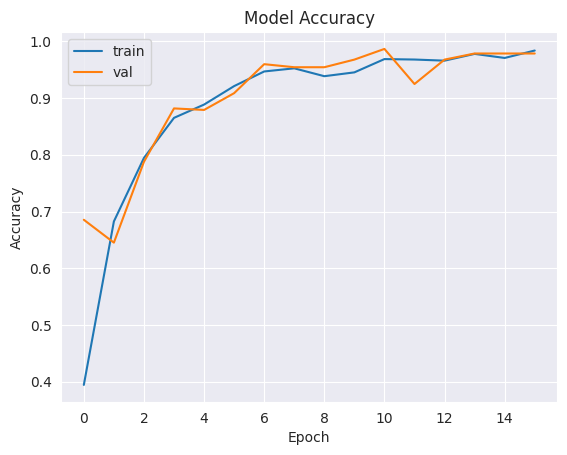

In [ ]:
# plot training and validation accuracy
sns.set_style("darkgrid")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

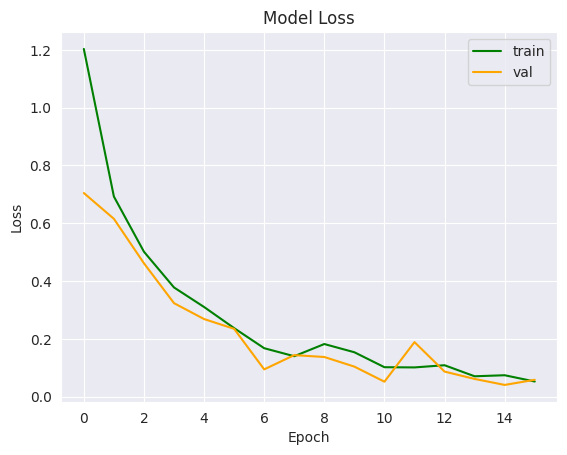

In [ ]:
# plot training and validation loss
sns.set_style("darkgrid")
plt.plot(history.history['loss'], color='green')
plt.plot(history.history['val_loss'], color='orange')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()